<a href="https://colab.research.google.com/github/Muhamadsulton/kaggle/blob/main/nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (2).csv


In [ ]:
# Подавление предупреждений
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('train.csv')

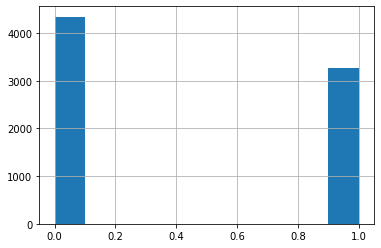

In [ ]:
data.target.hist()

In [ ]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
print(len(data['text']))

7613


In [ ]:
np.shape(data)

(7613, 5)

In [ ]:
data.describe(include= 'object')

,keyword,location,text
count,7552,5080,7613
unique,221,3341,7503
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...
freq,45,104,10


In [ ]:
data.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


In [ ]:
#функция для просмотра какой процент пропущенных данных мы имеем
def missing_values_table(data):
        # Общее количество пропущенных значений
        mis_val = data.isnull().sum()
        # Доля пропущенных значений
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        # Таблица с результатом расчета
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Переименовываем столбцы
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # Сортируем по столбцу с долей пропущенных значений в порядке убывания
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # Вывод сводной информации
        print("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

# Статистика пропущенных значений
missing_values = missing_values_table(data)
missing_values.head(15)

Your selected dataframe has 5 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
location,2533,33.3
keyword,61,0.8


In [ ]:
data = data.drop(['location','keyword','id'],axis = 1)

In [ ]:
data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
import re

In [ ]:
#применим функцию к нижниму регистру
def capitalizer(string: str) -> str:
    return string.lower()
# Применить функцию
data['text'] = [capitalizer(string) for string in data['text']]

In [ ]:
def remove_emails(x):
     return re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)

In [ ]:
def remove_urls(x):
    return re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)

In [ ]:
def remove_rt(x):
    return re.sub(r'\brt\b', '', x).strip()

In [ ]:
def remove_special_chars(x):
    x = re.sub(r'[^\w ]+', "", x)
    x = ' '.join(x.split())
    return x

In [ ]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [ ]:
import unicodedata
data['text_clean'] = data['text'].apply(lambda x: remove_emails(x))
data['text_clean'] = data['text_clean'].apply(lambda x: remove_urls(x))
data['text_clean'] = data['text_clean'].apply(lambda x: remove_rt(x))
data['text_clean'] = data['text_clean'].apply(lambda x: remove_special_chars(x))
data['text_clean'] = data['text_clean'].apply(lambda x: remove_accented_chars(x))

In [ ]:
data.head(10)

,text,target,text_clean
0,our deeds are the reason of this #earthquake m...,1,our deeds are the reason of this earthquake ma...
1,forest fire near la ronge sask. canada,1,forest fire near la ronge sask canada
2,all residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...
4,just got sent this photo from ruby #alaska as ...,1,just got sent this photo from ruby alaska as s...
5,#rockyfire update => california hwy. 20 closed...,1,rockyfire update california hwy 20 closed in b...
6,#flood #disaster heavy rain causes flash flood...,1,flood disaster heavy rain causes flash floodin...
7,i'm on top of the hill and i can see a fire in...,1,im on top of the hill and i can see a fire in ...
8,there's an emergency evacuation happening now ...,1,theres an emergency evacuation happening now i...
9,i'm afraid that the tornado is coming to our a...,1,im afraid that the tornado is coming to our area


In [ ]:
# добавления новой колонки к новому фрейму данных , функция apply передает значения всем объектам 
data = data.assign(text_length = data['text_clean'].apply(len))

In [ ]:
data.head()

,text,target,text_clean,text_length
0,our deeds are the reason of this #earthquake m...,1,our deeds are the reason of this earthquake ma...,68
1,forest fire near la ronge sask. canada,1,forest fire near la ronge sask canada,37
2,all residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,130
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,62
4,just got sent this photo from ruby #alaska as ...,1,just got sent this photo from ruby alaska as s...,85


In [ ]:
#УДАЛИТЬ ПРОБЕЛЫ
data['text_clean'] = [string.strip() for string in data['text_clean']]

In [ ]:
#удаление точек
data['text_clean'] = [string.replace(".", "") for string in data['text_clean']]

In [ ]:
data.head()

,text,target,text_clean,text_length
0,our deeds are the reason of this #earthquake m...,1,our deeds are the reason of this earthquake ma...,68
1,forest fire near la ronge sask. canada,1,forest fire near la ronge sask canada,37
2,all residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,130
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,62
4,just got sent this photo from ruby #alaska as ...,1,just got sent this photo from ruby alaska as s...,85


In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#токенизация текста
data = data.assign(text_tokenize = data['text_clean'].apply(word_tokenize))

In [ ]:
data.head()

,text,target,text_clean,text_length,text_tokenize
0,our deeds are the reason of this #earthquake m...,1,our deeds are the reason of this earthquake ma...,68,"[our, deeds, are, the, reason, of, this, earth..."
1,forest fire near la ronge sask. canada,1,forest fire near la ronge sask canada,37,"[forest, fire, near, la, ronge, sask, canada]"
2,all residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,130,"[all, residents, asked, to, shelter, in, place..."
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,62,"[13000, people, receive, wildfires, evacuation..."
4,just got sent this photo from ruby #alaska as ...,1,just got sent this photo from ruby alaska as s...,85,"[just, got, sent, this, photo, from, ruby, ala..."


In [ ]:
#удаление стоп слов
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
data['text_tokenize'] = data['text_tokenize'].apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
data.head()

,text,target,text_clean,text_length,text_tokenize
0,our deeds are the reason of this #earthquake m...,1,our deeds are the reason of this earthquake ma...,68,"[deeds, reason, earthquake, may, allah, forgiv..."
1,forest fire near la ronge sask. canada,1,forest fire near la ronge sask canada,37,"[forest, fire, near, la, ronge, sask, canada]"
2,all residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,130,"[residents, asked, shelter, place, notified, o..."
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,62,"[13000, people, receive, wildfires, evacuation..."
4,just got sent this photo from ruby #alaska as ...,1,just got sent this photo from ruby alaska as s...,85,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [ ]:
#лемитизация слов
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
#data['text_tokenize'] = data['text_tokenize'].apply(lambda x: [lemmatizer.lemmatize(y, pos='v') for y in x])

In [ ]:
data.head()

,text,target,text_clean,text_length,text_tokenize
0,our deeds are the reason of this #earthquake m...,1,our deeds are the reason of this earthquake ma...,68,"[deeds, reason, earthquake, may, allah, forgiv..."
1,forest fire near la ronge sask. canada,1,forest fire near la ronge sask canada,37,"[forest, fire, near, la, ronge, sask, canada]"
2,all residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,130,"[residents, asked, shelter, place, notified, o..."
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,62,"[13000, people, receive, wildfires, evacuation..."
4,just got sent this photo from ruby #alaska as ...,1,just got sent this photo from ruby alaska as s...,85,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [ ]:
#стемминг 
import nltk
from nltk.stem import SnowballStemmer

In [ ]:
snowball = SnowballStemmer("english")

In [ ]:
data['text_tokenize'] = data['text_tokenize'].apply(lambda x: [snowball.stem(y) for y in x])

In [ ]:
data.head()

,text,target,text_clean,text_length,text_tokenize
0,our deeds are the reason of this #earthquake m...,1,our deeds are the reason of this earthquake ma...,68,"[deed, reason, earthquak, may, allah, forgiv, us]"
1,forest fire near la ronge sask. canada,1,forest fire near la ronge sask canada,37,"[forest, fire, near, la, rong, sask, canada]"
2,all residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,130,"[resid, ask, shelter, place, notifi, offic, ev..."
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,62,"[13000, peopl, receiv, wildfir, evacu, order, ..."
4,just got sent this photo from ruby #alaska as ...,1,just got sent this photo from ruby alaska as s...,85,"[got, sent, photo, rubi, alaska, smoke, wildfi..."


In [ ]:
data = data.assign(text_str = data['text_tokenize'].apply(str))

In [ ]:
data.head()

,text,target,text_clean,text_length,text_tokenize,text_str
0,our deeds are the reason of this #earthquake m...,1,our deeds are the reason of this earthquake ma...,68,"[deed, reason, earthquak, may, allah, forgiv, us]","['deed', 'reason', 'earthquak', 'may', 'allah'..."
1,forest fire near la ronge sask. canada,1,forest fire near la ronge sask canada,37,"[forest, fire, near, la, rong, sask, canada]","['forest', 'fire', 'near', 'la', 'rong', 'sask..."
2,all residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,130,"[resid, ask, shelter, place, notifi, offic, ev...","['resid', 'ask', 'shelter', 'place', 'notifi',..."
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,62,"[13000, peopl, receiv, wildfir, evacu, order, ...","['13000', 'peopl', 'receiv', 'wildfir', 'evacu..."
4,just got sent this photo from ruby #alaska as ...,1,just got sent this photo from ruby alaska as s...,85,"[got, sent, photo, rubi, alaska, smoke, wildfi...","['got', 'sent', 'photo', 'rubi', 'alaska', 'sm..."


In [ ]:
#выбираем 'text_str' потому что он очищеный приведен к начальной форме удалены стоп слова проведена лексимизация текста итп 
X = data['text_str']
y = data['target']

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#vectorizer = TfidfVectorizer()

In [ ]:
#X = vectorizer.fit_transform(X)

In [ ]:
vectorizer = CountVectorizer()
# подгоняем модель под векторизацию
vectorizer.fit(X)
# преобразуем нашу разряженную матрицу 
X = vectorizer.transform(X)
print('размер разряженной матрицы: ', X.shape)
print('количество ненулевых вхождений: ', X.nnz)

размер разряженной матрицы:  (7613, 15133)
количество ненулевых вхождений:  68503


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.dummy import DummyClassifier

In [ ]:
#разбиение на тестовый и тренировочный набор данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
dummy = DummyClassifier(strategy='uniform', random_state=100)

In [ ]:
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.5042678923177938

In [ ]:
# создание модели случайного леса
rfc = RandomForestClassifier(criterion = 'entropy',oob_score=True ,n_jobs=-1, random_state=105)
# начинаем подгонку модели на тренировачных данных
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=105, verbose=0,
                       warm_start=False)

In [ ]:
# предсказать значения тестовой выборки
predictions_rfc = rfc.predict(X_test)
# посмотреть на точность предсказания 
f1_score(y_test,predictions_rfc)

0.7206896551724138

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adaboost = AdaBoostClassifier(random_state= 120)

In [ ]:
model_adaboost = adaboost.fit(X_train, y_train)

In [ ]:
# предсказать значения тестовой выборки
predictions_adaboost = model_adaboost.predict(X_test)
# посмотреть на точность предсказания 
f1_score(y_test, predictions_adaboost,average='micro')

0.7616546290216678

In [ ]:
logistic = LogisticRegression(C=1,penalty='l2',random_state=241, n_jobs=-1)

In [ ]:
logistic.fit(X_train, y_train)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=241, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# предсказать значения тестовой выборки
predictions_logistic = logistic.predict(X_test)
# посмотреть на точность предсказания 
f1_score(y_test, predictions_logistic,average='micro')

0.7872619829284307

In [ ]:
# n =3  уже подобранное число соседа
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# предсказать значения тестовой выборки
predictions_knn = knn.predict(X_test)
# посмотреть на точность предсказания 
f1_score(y_test, predictions_knn,average='micro')

0.7235718975705844

In [ ]:
from sklearn.svm import SVC

In [ ]:
#подобранные параметры
svc = SVC(gamma=0.1)

In [ ]:
model_svc = svc.fit(X_train, y_train)

In [ ]:
# предсказать значения тестовой выборки
predictions_svc = model_svc.predict(X_test)
# посмотреть на точность предсказания 
f1_score(y_test, predictions_svc,average='micro')

0.7964543663821405

In [ ]:
decisiontree = DecisionTreeClassifier(criterion = 'gini',max_depth=39,min_samples_leaf=3,min_samples_split=2, random_state = 244)

In [ ]:
model_tree = decisiontree.fit(X_train, y_train)

In [ ]:
# предсказать значения тестовой выборки
predictions_tree = model_tree.predict(X_test)
# посмотреть на точность предсказания 
f1_score(y_test, predictions_tree,average='micro')

0.7498358502954695

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
classifier = MultinomialNB()
X_class = X_train.toarray()

In [ ]:
model_bayes = classifier.fit(X_class, y_train)

In [ ]:
# предсказать значения тестовой выборки
predictions_bayes = model_bayes.predict(X_test)
# посмотреть на точность предсказания 
f1_score(y_test, predictions_bayes,average='micro')

0.7839789888378201

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
classifier_bernulli = BernoulliNB()

In [ ]:
s = BernoulliNB()

In [ ]:
model_bernulli = classifier_bernulli.fit(X_class,y_train)

In [ ]:
# предсказать значения тестовой выборки
predictions_bernulli = model_bernulli.predict(X_test)
# посмотреть на точность предсказания 
f1_score(y_test, predictions_bernulli,average='micro')

0.7984241628365069

ГРАДИЕНТНЫЙ БУСТИНГ

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier()

In [ ]:
model_gb = gb.fit(X_train,y_train)

In [ ]:
# предсказать значения тестовой выборки
predictions_gb = model_gb.predict(X_test)
# посмотреть на точность предсказания 
f1_score(y_test, predictions_gb,average='micro')

0.747866053841103

XGBOOST

In [ ]:
import xgboost

In [ ]:
xg = xgboost.XGBClassifier()

In [ ]:
model_xg = xg.fit(X_train,y_train)

In [ ]:
# предсказать значения тестовой выборки
predictions_xg = model_xg.predict(X_test)
# посмотреть на точность предсказания 
f1_score(y_test, predictions_xg,average='micro')

0.7386736703873934

XGBOOST XGBRFCLASSIFIER

In [ ]:
xg_rfc = xgboost.XGBRFClassifier()

In [ ]:
model_xg_rfc = xg_rfc.fit(X_train,y_train)

In [ ]:
# предсказать значения тестовой выборки
predictions_xg_rfc = model_xg_rfc.predict(X_test)
# посмотреть на точность предсказания 
f1_score(y_test, predictions_xg_rfc,average='micro')

0.6454366382140512

Стахостический градиентный спуск

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd = SGDClassifier()

In [ ]:
model_sgd = sgd.fit(X_train,y_train)

In [ ]:
# предсказать значения тестовой выборки
predictions_sgd = model_sgd.predict(X_test)
# посмотреть на точность предсказания 
f1_score(y_test, predictions_sgd,average='micro')

0.7609980302035457

In [ ]:
np.random.seed(0)

ОПТИМИЗАЦИЯ НАШИХ АЛГОРИТМОВ

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
#from sklearn.pipeline import Pipeline

In [ ]:
penalty = ['l1','l2']
C = np.logspace(0,4,10)
hyperparametrs = dict(C=C, penalty=penalty)

In [ ]:
grid_search_logit = GridSearchCV(logistic, hyperparametrs, cv = 5, verbose = 0)

In [ ]:
best_model_logit = grid_search_logit.fit(X_train, y_train)

In [ ]:
print('Лучший штраф:', best_model_logit.best_estimator_.get_params()['penalty'])
print('Лучший C:', best_model_logit.best_estimator_.get_params()['C'])

Лучший штраф: l2
Лучший C: 1.0


ОПТИМИЗАЦИЯ К - БЛИЖАЙШИХ СОСЕДЕЙ


In [ ]:
n_neighbors = range(1,36)
param_grid = {'n_neighbors':n_neighbors}

In [ ]:
gs = GridSearchCV(knn, param_grid, cv = 5, verbose=1, n_jobs=-1)

In [ ]:
best_model_knn = gs.fit(X_train,y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   30.6s finished


In [ ]:
best_model_knn.best_params_

{'n_neighbors': 3}

ОПТИМИЗАЦИЯ МЕТОДА ОПОРНО МАШИННЫХ ВЕКТОРОВ3

In [ ]:
param_grid_svm = {'C': range(1,11),
                  'gamma': [1,0.1, 0.01, 0.001, 0.0001],
                  'kernel':['rbf','linear','poly','sigmoid']}

In [ ]:
grid_svm = GridSearchCV(svc, param_grid_svm,cv=5, verbose=1, n_jobs=-1)

In [ ]:
best_model_svm = grid_svm.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 34.8min finished


In [ ]:
best_model_svm.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

ОПТИМИЗАЦИЯ СЛУЧАЙНОГО ЛЕСА


In [ ]:
#решетчетый поиск для оптимизации случайных лесов
#n_estimators = [300,500,700]
#param_grid = {'n_estimators':n_estimators,
              #'min_samples_leaf':range(2,9),
              #'min_samples_split':range(2,9),
              #'max_depth': range(1,71)}#глубина дерева от 1 до 51 с шагом 1

In [ ]:
#grid_search_rfc = GridSearchCV(rfc, param_grid, cv = 3, verbose=1, n_jobs=-1)

In [ ]:
#best_model_rfc = grid_search_rfc.fit(X_train,y_train)

In [ ]:
#best_model_rfc.best_params_

In [ ]:
#model_rfc = RandomForestClassifier(criterion= 'entropy', n_estimators=500, max_depth = 50,min_samples_leaf=3,random_state=300, n_jobs=-1 )

In [ ]:
#model_rfc_optim = model_rfc.fit(X_train,y_train)

In [ ]:
# предсказать значения тестовой выборки
#predictions_rfc_optim = model_rfc_optim.predict(X_test)
# посмотреть на точность предсказания 
#f1_score(y_test, predictions_rfc_optim,average='micro')

ОПТИМИЗАЦИЯ ДЕРЕВА ПРИНЯТИЯ РЕШЕНИЙ


In [ ]:
param_grid_clf = {
              'max_depth': range(1,41),#глубина дерева от 1 до 71 
              'min_samples_split': range(2,8),
              'min_samples_leaf':range(2,8)}

In [ ]:
grid_search_tree = GridSearchCV(decisiontree, param_grid_clf, cv = 5, verbose=1, n_jobs=-1)

In [ ]:
best_model_tree = grid_search_tree.fit(X_train,y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 346 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 846 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 1546 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3546 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 4846 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 6346 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 7197 out of 7200 | elapsed: 12.8min remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 12.8min finished


In [ ]:
best_model_tree.best_params_

{'max_depth': 39, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [ ]:
param_ber = {'alpha' : [0,1]}

In [ ]:
grid_search_ber = GridSearchCV(model_bernulli,param_ber,cv=10,verbose=1,n_jobs=-1)

In [ ]:
best_model_ber = grid_search_ber.fit(X_train,y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.1s finished


In [ ]:
best_model_ber.best_params_

{'alpha': 1}

Кросс валидация логистической регрессии 

In [ ]:
from sklearn.model_selection import KFold,cross_val_score


In [ ]:
def kf_logit(X,y):
  cross_logit = KFold(n_splits = 5,shuffle = True,random_state = 41)
  return cross_val_score(logistic,X,y,cv = cross_logit,scoring = "f1",n_jobs = -1).mean()

In [ ]:
print(kf_logit(X,y))

КРОСС ВАЛИДАЦИЯ ДЕРЕВА ПРИНЯТИЯ РЕШЕНИЙ

In [ ]:
def kf_tree(X,y):
   cross_tree = KFold(n_splits = 5,shuffle = True,random_state = 42)
   return cross_val_score(model_tree,X,y,cv = cross_tree,scoring = "f1",n_jobs = -1).mean()

In [ ]:
print(kf_tree(X,y))

КРОСС ВАЛИДАЦИЯ СЛУЧАЙНЫХ ЛЕСОВ

In [ ]:
def kf_rfc(X,y):
   cross_rfc = KFold(n_splits = 5,shuffle = True,random_state = 43)
   return cross_val_score(rfc,X,y,cv = cross_rfc,scoring = "f1",n_jobs = -1).mean()

In [ ]:
print(kf_rfc(X,y))

КРОСС ВАЛИДАЦИЯ Метода машинна опорных векторов


In [ ]:
def kf_svc(X,y):
  cross_svc = KFold(n_splits=5,shuffle=True,random_state=44)
  return cross_val_score(svc,X,y,cv=cross_svc, scoring="f1",n_jobs=-1).mean()

In [ ]:
print(kf_svc(X,y))

КРОСС ВАЛИДАЦИЯ АДАБУСТКЛАССИФАЙРА

In [ ]:
def kf_adaboost(X,y):
  cross_adaboost = KFold(n_splits=5,shuffle=True,random_state=45)
  return cross_val_score(adaboost,X,y,cv=cross_adaboost,scoring="f1",n_jobs=-1).mean()

КРОСС ВАЛИДАЦИЯ ПОЛИНОМИАЛЬНОГО БАЙСЕВОГО КЛАССИФИКАТОРА

In [ ]:
def kf_multi(X,y):
  cross_multi = KFold(n_splits=5,shuffle=True,random_state=45)
  return cross_val_score(classifier,X,y,cv=cross_multi,scoring="f1",n_jobs=-1).mean()

In [ ]:
print(kf_multi(X,y))

КРОСС ВАЛИДАЦИЯ БЕРНУЛИ БАЙСОВОГО КЛАССИФИКАТОРА

In [ ]:
def kf_bernulli(X,y):
  cross_bernulli = KFold(n_splits=5,shuffle=True, random_state=47)
  return cross_val_score(classifier_bernulli,X,y,cv=cross_bernulli,scoring="f1",n_jobs=-1).mean()

In [ ]:
print(kf_bernulli(X,y))

КРОСС ВАЛИДАЦИЯ К-БЛИЖАЙШИХ СОСЕДЕЙ

In [ ]:
def kf_knn(X,y):
  cross_knn = KFold(n_splits=5,shuffle=True, random_state=48)
  return cross_val_score(classifier_bernulli,X,y,cv=cross_knn,scoring="f1",n_jobs=-1).mean()

In [ ]:
print(kf_knn(X,y))

КРОСС - ВАЛИДАЦИЯ ГРАДИЕНТНОГО БУСТИНГА

In [ ]:
def kf_gb(X,y):
  cross_gb = KFold(n_splits=5,shuffle=True,random_state=49)
  return cross_val_score(gb,X,y,cv=cross_gb,scoring='f1',n_jobs=-1).mean()

In [ ]:
print(kf_gb(X,y))

КРОСС-ВАЛИДАЦИЯ XGBOOST

In [ ]:
def kf_xg(X,y):
  cross_xg = KFold(n_splits=5,shuffle=True,random_state=50)
  return cross_val_score(xg,X,y,cv=cross_xg,scoring='f1',n_jobs=-1).mean()

In [ ]:
print(kf_xg(X,y))

ЗАГРУЗКА ТЕСТОВОГО НАБОРА ДАННЫХ

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
test = test.drop(['id','keyword','location'],axis=1)

In [ ]:
import unicodedata
test['text_clean'] = test['text'].apply(lambda x: remove_emails(x))
test['text_clean'] = test['text_clean'].apply(lambda x: remove_urls(x))
test['text_clean'] = test['text_clean'].apply(lambda x: remove_rt(x))
test['text_clean'] = test['text_clean'].apply(lambda x: remove_special_chars(x))
test['text_clean'] = test['text_clean'].apply(lambda x: remove_accented_chars(x))

In [ ]:
test.head()

,text,text_clean,text_tokenize
0,Just happened a terrible car crash,Just happened a terrible car crash,"[just, happened, a, terrible, car, crash]"
1,"Heard about #earthquake is different cities, s...",Heard about earthquake is different cities sta...,"[heard, about, earthquake, is, different, citi..."
2,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are ...,"[there, is, a, forest, fire, at, spot, pond, g..."
3,Apocalypse lighting. #Spokane #wildfires,Apocalypse lighting Spokane wildfires,"[apocalypse, lighting, spokane, wildfires]"
4,Typhoon Soudelor kills 28 in China and Taiwan,Typhoon Soudelor kills 28 in China and Taiwan,"[typhoon, soudelor, kills, 28, in, china, and,..."


In [ ]:
#применим функцию к нижниму регистру
def capitalizer(string: str) -> str:
    return string.lower()
# Применить функцию
test['text_clean'] = [capitalizer(string) for string in test['text_clean']]

In [ ]:
#токенизация текста
test = test.assign(text_tokenize = test['text_clean'].apply(word_tokenize))

In [ ]:
test['text_tokenize'] = test['text_tokenize'].apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
#test['text_tokenize'] = test['text_tokenize'].apply(lambda x: [lemmatizer.lemmatize(y, pos='v') for y in x])

In [ ]:
test['text_tokenize'] = test['text_tokenize'].apply(lambda x: [snowball.stem(y) for y in x])

In [ ]:
test = test.assign(text_str = test['text_tokenize'].apply(str))

In [ ]:
test.head()

,text,text_clean,text_tokenize,text_str
0,Just happened a terrible car crash,just happened a terrible car crash,"[happen, terribl, car, crash]","['happen', 'terribl', 'car', 'crash']"
1,"Heard about #earthquake is different cities, s...",heard about earthquake is different cities sta...,"[heard, earthquak, differ, citi, stay, safe, e...","['heard', 'earthquak', 'differ', 'citi', 'stay..."
2,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are ...,"[forest, fire, spot, pond, gees, flee, across,...","['forest', 'fire', 'spot', 'pond', 'gees', 'fl..."
3,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires,"[apocalyps, light, spokan, wildfir]","['apocalyps', 'light', 'spokan', 'wildfir']"
4,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills 28 in china and taiwan,"[typhoon, soudelor, kill, 28, china, taiwan]","['typhoon', 'soudelor', 'kill', '28', 'china',..."


In [ ]:
test_X = test['text_str']
# подгоняем модель под векторизацию
test_X = vectorizer.transform(test_X)
# преобразуем нашу разряженную матрицу 
#print('размер разряженной матрицы: ', X.shape)
#print('количество ненулевых вхождений: ', test_X.nnz)

In [ ]:
final_pred = model_bernulli.predict(test_X)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv


In [ ]:
sub_d = pd.read_csv('sample_submission.csv')
sub_d['target'] = final_pred
sub_d.to_csv('Submissionsd_nlp.csv', index = False)

In [ ]:
from google.colab import files
uploaded = files.download('Submissionsd_nlp.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ПРОГОН МОДЕЛЕЙ 100 РАЗ И ЗАПИСАТЬ ИХ РЕЗУЛЬТАТ В МОДЕЛЬ

In [ ]:
stat_logist = []
for i in range(100):
  stat_logist.append(kf_logit(X,y))

In [ ]:
stat_tree = []
for i in range(100):
  stat_tree.append(kf_tree(X,y))

In [ ]:
stat_tadaboos = []
for i in range(100):
  stat_adaboost.append(kf_adaboost(X,y))

In [ ]:
stat_svc = []
for i in range(100):
   stat_svc.append(kf_svc(X,y))

In [ ]:
stat_mullti = []
for i in range(100):
  stat_mullti.append(kf_multi(X,y))

In [ ]:
stat_bernulli = []
for i in range(100):
  stat_bernulli.append(kf_bernulli(X,y))

In [ ]:
stat_knn = []
for i in range(100):
  stat_knn.append(kf_knn(X,y))

In [ ]:
stat_rfc = []
for i in range(100):
  stat_rfc.append(kf_rfc(X,y))

In [ ]:
stat = pd.DataFrame({'stat_logistic':stat_logist, 'stat_adaboost':stat_adaboost, 'stat_mullti':stat_mullti,'stat_bernulli':stat_bernulli,
                     'stat_svc':stat_svc,'stat_knn':stat_knn,'stat_tree':stat_tree})

In [ ]:
stat.head()

ПРОВЕРКА СТАТ ГИПОТЕЗЫ МАННА УИТНИ

In [ ]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(stat['stat_logistic'], stat['stat_knn'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('одинаковые распределения (принимаем гипотезу H0)')
else:
	print('разные распределения (отвергаем гипотезу H0)')

In [ ]:
stat, p = mannwhitneyu(stat['stat_logistic'], stat['stat_tree'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('одинаковые распределения (принимаем гипотезу H0)')
else:
	print('разные распределения (отвергаем гипотезу H0)')